# Loading datasets. Run before any other cells

Below cell is responsible for loading datasets needed for following exercises. 
You can use it two ways:
- load it in every cell
- load it onece in one additional cell an save X,y, target names ( in case of mnist dataset ) into some variable and then use it in following cells

Two datasets available in below cells are:
- MNIST dataset containing base of handwritten digits
- simple linear classifier with two elements for getting intuition on how to use basic skelarn commands, without any need to make some time consuming analysis of dataset etc.

Feel free to use any other dataset you want in following exercises

In [ ]:
# model loading
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_classification


"""
    When loading MNISt dataset it`s better to write code using collab or on system with nvidia gpu available
    If you want to have faster and easier dataset please use load_iris() method from sklearn library
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
"""

def load_mnist_data():
    """
        Method to load MNIST dataset 
        
        Returns:
            X - data
            y - target labels
            target_names - labels for this dataset 
    """
    mnist_data = fetch_openml('mnist_784', version=1)
    print("keys of data dictionary: ", mnist_data.keys())
    
    X, y = mnist_data['data'], mnist_data['target']
    
    return X, y, mnist_data.target_names

def load_simple_classifier_dataset(weights=[0.99, 0.01]):
    """
        Method to load simple dataset generator, generate dataset
        
        Returns:
            X - data
            y - target labels
    """
    
    X, y = make_classification(n_samples=1000, n_classes=len(weights), weights=weights, flip_y=0, random_state=1)
    
    return X, y

# Collab Basics

[Introduction to google collab](https://colab.research.google.com/notebooks/intro.ipynb#)

In order to run notepad on GPU/TPU you have to do following :

`Runtime -> Change runtime type -> choose GPU/TPU`

In order to load jupyter notebook files into collab you have to do following :

`File -> Upload notebook`

In order to use collab you have be logged into your gmail account

# SKLEARN basics

Sklearn is library based on scipy made for machine learning. Basicly it's collection of ready to use basic ML algorithms, without neural networks included. 
Sklearn library can be found [here](https://scikit-learn.org/stable/)

All models shares common interface:

- **fit()** method that is used to train model based on given input
- **predict()** method, that is used for predicting/ classifying given data

### fit() method

**fit(X, y)** method takes two array arguments : input_data and target_labels

It's using gradient descent to optimize our model paramters given input data

It requied that those two input data are *numpy arrays* or *pandas DataFrame* objects. Also those values need to be continuous, like price of the house or some catagory information.
Additionally before working with those data, ther cannot be any missing values, so in most cases some preprocessing is needed.

Example [SGDClassifier fit method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier.fit)

### predict() method

**predict(X)** method takes only one array argument as input : input_data. Then it just pass this data through trained model and give us some "prediction" output. 

Same as with **fit()** method input_data needs to be *numpy array* or *pandas DataFrame* and has to be continuous/without any missing values.

Example [SGDClassifier predict method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier.predict)

### score() method

**score(X, y)** method tells us how accurate our model is. It's basic measurement of our model behaviour

Example [SGDClassifier score method](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgd#sklearn.linear_model.SGDClassifier.score)

In [ ]:
from sklearn.linear_model import SGDClassifier
"""
    TODO:
    - create model using SGDClassifier from sklearn library
    - train model using X, y data
    - predict outputs for X[1:5] and compare them with targeted ones
    - calculate accuracy metric how good classifier is 
"""

X, y = load_simple_classifier(weights=[0.60, 0.40])

# uncomment below if you want to use harder dataset
# X, y, _ = load_mnist_data()

# TODO:
# - create classifier
# - train model using fit()
# - calculate metric using score()

# SKLEARN data manipulation

Another thing that is used in ML/ neural networks from sklearn is ability to easly manipulate input data:

- splitting data into traininig/testing dataset
- using technique called *Cross validation*
- making metrics to evalute accuracy of our model


### Splitting data into training/testing dataset

First one basic concept: *overfitting*. 

Overfitting occurs when our model predicts output/classes very good during training but gets bad results/ cannot generalize very well when get him data he didn't saw during training ( it cannot predict good output for new data ). This is bad, bacause we want our model to predict with great accuracy always.

In order to check if this would happens we can do simple trick: 
- given out input_data with corresponding labels, we can split them into training part and testing part. 
- during training we don't touch testing part of our input_data/lables and we only train our model on trainind data
- after trianing is done we check how good it behave on data it didn't saw earlier
- if there is big gap between accuracy of both sets, we have overfitting and we have to find a way to handle it


### train_test_split()

In sklearn there is method [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split) that does this kind of split/shuffle etc. 

If we give our model too little data during training we can meet other problem called underfitting. It happens when our model doesn't generalize well on any data, for example by ddrawing only one line

After training long enough our model will learn to fit training data with 100% accuracy


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

"""
    TODO:
    - load simple clasisfier or mnist dataset of your choice ( MNIST is harder but longer to run)
    - import all needed libraries
    - create classifier of your choice
    - split dataset into train/test part
    - train classifier using training part of dataset
    - calculate accuracy metric using test part of dataset
    - check score on different splits
    - check score on different classifiers ( )
"""

### Feature Pipelines in sklearn

Sometimes we may want to make some transformations on input data, before we put it into out model to proceed for example:

- change words into some numbers ( survived/ not survived into 1/0 )
- fill out blank places using some sort of values ( mean value of correct data in given column/ filling with last correct value etc ...)
- normalize data ( to get rid of big differences/ some trends )
- when we have linear dataset, transform its features into higher dimensions to have more informations available ( or less depends from case )
- fit some regression/ classfication at the end

In Skleanr there is group of operations called [Transformations](https://scikit-learn.org/stable/data_transforms.html) that can be used to preprocess our data.
Such preprocessing can be made of for eample:
- [Normalization](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)
- [Scaling](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)
- [Changing linear data into polynomial one](https://scikit-learn.org/stable/modules/preprocessing.html#generating-polynomial-features)
- [Filling missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=imputer#sklearn.impute.SimpleImputer)

By using those plus our classifer we can make pipeline to preoprocess data and train/predictc/score out model without need of calling multiple methods by hand.

One rule is that we can have as many transformations in pipeline as we want, but last element should be some model with fit method
For example we can have :
- Scaling
- Normalization
-Changing to polynomial 
-...
- Filling missing values
-**Creation of some classifier for example SGDClassifier**

This whole pipleine can be done using sklearn [Piepeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

Example of simple pipleine can be seen below:


```python
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())
model.fit(X,y)
```

What it does is :
- fill empty/Nan/Null values with mean value from whole feature
- change linear dependencies in dataset into higher degree [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures)
- run linear regression on given dataset



In [ ]:
import numpy as np
from numpy import nan
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])


model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

model.fit(X, y)

print("traget y : ", y)
print("predicted y ", model.predict(X))

traget y :  [14 16 -1  8 -5]
predicted y  [14. 16. -1.  8. -5.]


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

"""
TODO:
    - make simple pipeline for mnist dataset()/ simple classifer that will normalize intput data, change data to degree=3 and run 3 different classifiers on it
    - calculate score of given preprocessings
    - do the same with mnist dataset with or without changing degree ( with will take longer to run )
"""

### Overfitting Underfitting

Often in some articles/internet there is information that model XXX is underfitting or model XXX is overfitting, but what exacly is underfitting or overfitting ?

Underfitting is when our model doesn't generalize well on training/test/any data, for example trying to aproximate quadratic function with linear one.

Overfitting on the oher hand is when our model tries to fit every sinbgle point we give him during training. Because of that it learns training dataset patterns/relations, not general one. Golden goose in in the middle. Below there are three drawings with how both of them plus ok model looks like :

![image.png](https://miro.medium.com/max/702/0*Wup-0b5KI6-8cJB4.jpg)

We can see here that ok model leave some points on ther other side of classification border.

There are two things connected with overfitting and underfitting :

- **bias**  that tells us how much do we differ from baseline error rate ( for example hman classification labels )
- **variance** tells us how much do we differ between our training error and testing error ( testing on data that wasn't used during training )

|                 |               |           |               |              |
|-----------------|---------------|-----------|---------------|--------------|
| Train set error | 1%            | 15%       | 13%           | 0\.5%        |
| Test set error  | 11%           | 16%       | 30%           | 1%           |
|                 | High Variance | High Bias | High Variance | Low Variance |
|                 |               |           | High Bias     | Low BIas     |

Basically we want to have smallest gap between training dataset and testing dataset error and  be closest to human error rate

Some video explaination about bias/variance:
- [Bias/Vairance](https://www.youtube.com/watch?v=SjQyLhQIXSM)
- [How to fight Bias/Variance](https://www.youtube.com/watch?v=C1N_PDHuJ6Q&t=308s)

Below there is sample methods that are underfitting and overfitting.

Also please read about [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) feature and use it to change linear regression into [polynomial regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures) in order to fit non linear dataset.

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

"""
    TODO:

    - Fill blanks in code to make it work using numpy/ sklearn only
    - Create LinearRegression model with default parameters
    - Create Pipeline that will change linar regression into polynomial one
    - fit and predict on created pipeline
    - plot returned values

    First plot will show underfitting model
    Second plot will show overfitting model
"""

# definition of sin function that will be used
def true_fun(X):
    return np.sin(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 15]

# input/output data creating
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 10))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    #TODO:
    #  create linear regression model 
    #  create polynomial_features that will have actual degree and include_bias=False
    #  combine them both in one Pipeline
    #  train pipeline using fit() method and prepared X, y 

    X_test = np.linspace(0, 1, 100)
    
    #TODO:
    #  predict output of pipeline for X_test dataset and put it into #######, place below
    
    plt.plot(X_test, #######, label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
plt.show()

### Cross Validation

In some cases when we make split of data into train and test parts, we can get test part containing similiar data that are in train part. In this case we would get very good results on both, but when new data would arive model will be bad.

To avoid this we can use cross validation.

Basically idea is following:
1. We're splitting data into for example 5 parts ( 5 folds )
2. we're training our model on all parts except one and get some result
3. next we train new model again on 4 parts except another one part
4. etc..

Below picture taken from skleanr, shows how it looks like:

![image.png](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Each time we're training our model ( from the very start ) on 4 parts, and test on 1 part. Each time testing part is different.

This will allow us to be sure that our model is behaving very well on different, unseen datasets, so we can get more assurance that there is no repeating patterns that could make model accuracy score higher that it really is 

To calculate our metric we can use [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) method from sklearn. It will return us evaluation metric for each fold.


cross_val_score and cross_val_predict are only for diagnostic data. Inside they make deep copy with new estimator so in order to do something with classifier we have to fit them

In [ ]:
from sklearn.model_selection import cross_val_score

"""
    TODO:
    - import all needed libraries
    - create classification classifier
    - split data into trainng/test dataset with 80%/20% split
    - check classifier score
    - calculate cross validation score using scoring="accuracy" and 5 folds
    - check how score is changing when using 2,3,10 folds
"""

X, y, _ = load_mnist_data()

#  TODO : put code here
#

In [ ]:
"""
ADVANCED TODO:
- write cross-validation from scratch using following sklearn methods:
  - StratifiedKfold
  - remember that each "fold" have to have fresh classifier that will be trained and then makes prediction on given fold. Then it should give accuracy of given fold ( correct/ all )
- write cross-validation from scratch without using sklearn methods, only numpy/python one
- compare results with those provided by sklearn
"""

# Metrics

As it comes for metrics, there is one basic, that everyone has in mind when asked: accuracy. 
But it apears that this metric is a bit screwed when it comes to real datasets, that are mostly imbalanced ( there is more one class than others ). 
Below there is simple dataset that i very imbalanced (95% vs 5%)

In [ ]:
from numpy import unique
# generate 2 class dataset
# with split 99%/1% in class labels
X, y = load_simple_classifier()
# summarize dataset
classes = unique(y)
total = len(y)
for c in classes:
    n_examples = len(y[y==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))

### Imbalanced datasets splitting/ cross validation

When we want to measure this dataset behaviour by "accuracy" we can make very simple program that will classify everything as class 0 and still we get >90% accuracy, so we check nothing See example below

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score

# classifiers have to inherit from BaseEstimator

class Always_class_0(BaseEstimator):
    # fit will return nothing interesting and do nothing becuase we don`t want to train anything
    def fit(self, x, y=None):
        return self
    # predict() will always return 0 for all input data
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

X, y = load_simple_classifier()
    
clf = Always_class_0()
cross_val_score(clf, X, y, cv=5, scoring="accuracy")

Also there is one more problem with unbalanced datasets - when we want to split them, we can have few sets that are not reliable for example : all '1' classes are in train set or vice versa

In [ ]:
"""

TODO:
- make spit with following parameters: 80%/20% split and random_state=3
- use load_simple_classifier() dataset
"""

# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

As we can see in the above example we have all "1" classes in Train dataset, so basically when we would test out model with test_dataset, there would be no real testing done, due to absence of `1` classes there. Also we can have viceversa situation.
To fight with this sklearn allows us to "stratify" our split or kfold.
This is done with **stratify** parameter in [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split) method, that will split given values in train and test dataset according to given split. So if we make 80%/20% split, then we will have same split on our classes

In [ ]:
"""
    TODO:
    - make stratified spit with following parameters: 80%/20% split and random_state=3
    - use load_simple_classifier() dataset
"""

# summarize
train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

Due to that there are several other metrics that are used in ML to check how good our model is:
- Confusion matrix
- Precision
- Recall
- Precision-Recall Curve
- ROC curve
- F1/ F_beta score

### Confusion Matrix

Better way to evaluate performance is to create so called **Confusion Matrix**. Basic idea behind this is to print number of times given class is classified as class A, class Z, class Y, class Z etc.

To make confusion matrix, first we need to have predictions of our model, so we can compare desired prediction with actually predicted one.

This can be done with sklearn [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) method. It's similiar to **cross_val_score** presented earlier, but it gives us back predictions, not scores of each fold. It uses K-fold cross-validation so each fold predictions are made with fresh model. syntax is the same as in **cross_val_score method**

For classifiers like [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier) that doesnt have **decision_function()** method but have **predict_proba()** method, there should *method='predict_proba'* set in cross_val_predict

For classifiers that have **decision_function()** method, like [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclass#sklearn.linear_model.SGDClassifier.decision_function) ther should be *method='decision_function'* set in cross_val_predict

for cross_val

In [ ]:
"""
    TODO:
    - include all needed files
    - split dataset into train test datasets 80%/20%
    - make cross validation prediction with 3/5 folds. Compare results
"""

X, y, class_names = load_mnist_data()
# TODO  Put code here
#

When we have our cross validation predictions, we can create confusion matrix. Sklearn gives us three kind of interfaces for that:
- [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.confusion_matrix) method
- [multilabel_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.multilabel_confusion_matrix) for multilableed data ( one element can have few labels )
- [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html?highlight=confusion%20matrix#sklearn.metrics.plot_confusion_matrix) for ploting confusion matrix 


Basically they are doing the same thing underneath, but with different result and using different scale ( mulit/single label, matplotlib ploting )

Each row in confusion matrix represents *true class* of data, while each column represents *predicted class*. Basically ideal confusion matrix contains non-zero values only on diagonal :

| 1000000 | 0       |
|---------|---------|
| 0       | 1000000 |




In [ ]:
"""
    TODO:
      For mnist dataset loaded above:
    - include all needed includes
    - split dataset into train and test parts
    - train model
    - create confusion matrix (test part)
    - plot confusion matrix (test part)
    - example of plotting confusion matrix can be found under following link: 
      https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    - try different supervised classifers to get intuition about them
"""


In [ ]:
"""
    TODO:
    - do above or other datasets
    - try differnet classification generated datasets from  https://scikit-learn.org/stable/modules/classes.html#samples-generator
"""

#TODO 
# put code here


From above picture we can read few things:
- **True Positives TP** how many elements that have lable "0" are classified as "0" 
- **False Positives FP** how many elements that have label "0" are wrongly classified as "1"
- **True Negatives** how many elements that have lable "1" are classified as "1"
- **False Negatives** how many elements that have label "1" are wrongly classified as "0"

![confusion](https://miro.medium.com/max/1106/1*vMEqRXTl8PRfRtgWgwUVEg.jpeg)

In most cases there is better to calculate some conciese metric to give information for example for business unit etc than big chart of numbers. Below are some of most used metrics that can be taken from confusion matrix/ cross validation prediction

### Precision

When we have cross validation prediction done  we can calculate few metrics from it, among what there is **precision**

Precision an be described as : 

**From all elements classified as Positive (TF + FP) how many is really positive (TP)**

or in other words:

**high precision means that an algorithm returned more relevant/correct results than irrevelant/incorect ones**

$$precision=\frac{TP}{TP + FP}$$

In sklearn we can use [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html?highlight=precision_score#sklearn.metrics.precision_score) to calculate this

When do we want high Precision? 
For example if we want to have system that filters youtube videos from patostreamers. In this case we want high precision, so system keeps only safe videos/streamers. On the other hand we can have low recall, what means that system rejected many good videos too , but still it's better than passing some patostreamers.

In [ ]:
"""
    TODO:
    - calculate precision score

    - calculate cross validation prediction for simple dataset
    - calcaulte precision score for mnist dataset  (with  cross_val_predict)
    - print both scores
    - try different classifiers
    - try differnet classification generated datasets from  https://scikit-learn.org/stable/modules/classes.html#samples-generator
    - try different classification datasets from https://scikit-learn.org/stable/modules/classes.html#loaders
"""

from sklearn.metrics import precision_score

### Recall

When we have cross validation prediction done  we can calculate few metrics from it, among what there is **recall**

Precision an be described as : 

**From all elements that are trully Positive (TF + FN) how many was classified as positive (TP)**

or in other words:

**high recall means that most of the results returned by algorithm are relevant/correct**

$$recall=\frac{TP}{TP + FN}$$

In sklearn we can use [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html?highlight=recall_score#sklearn.metrics.recall_score) to calculate this

When do we want high Recall? 
For example if we want to have system that filters data, for example if we want to check is some transaction is fraud or not. In this case we want to be sure that we catch as many frauds transaction as we can. We can have smaller precision here, so we can flag some non-fraud transaction as fraud ones, but if we get rid of like 99% of frauds at cost of hand checking some ok transactions thats still better than letting frauds through.

In [ ]:
"""

TODO:
- calculate recall score for  mnist dataset

- calculate cross validation prediction for simple dataset
- calcaulte recall score for above dataset  (with  cross_val_predict)
- check what are results for different classifiers
- try differnet classification generated datasets from  https://scikit-learn.org/stable/modules/classes.html#samples-generator
- try different classification datasets from https://scikit-learn.org/stable/modules/classes.html#loaders

"""
X, y = load_simple_classifier(weights=[0.90, 0.10])

#TODO
# put code here
#


### Precision-Recall curve

There is one more thing connected to both **precision** and **recall** is trade-off between them. 

Simple example:

We have plane with people, from some of them are terrorists (split 96%/4%). We want to label them, so our metrics would be:

TP - correctly identified terrorist
FP - non terrorist incorectly labeled as terrorist

TN - non terrorist correctly labeled as non terrorist
FN - terrorist incorectly labeled as non terrorist

$$recall=\frac{\mathit{correctly\_identified\_terrorist}}{\mathit{correctly\_identified\_terrorist} + \mathit{terrorist\_incorectly\_labeled\_as\_non\_terrorist}}$$


$$precision=\frac{\mathit{correctly\_identified\_terrorist}}{\mathit{correctly\_identified\_terrorist} + \mathit{non\_terrorist\_incorectly\_labeled\_as\_terrorist}}$$

IN this case we can see two corner cases:

If we label all people as terrorists we will have following values:

$$recall \approx 1.0 $$
$$precision \approx 0.0 $$

If we label only 1 terrorist as terrosit and other as non terrorist we will have following values:

$$recall \approx 0.0$$
$$precision \approx 1.0$$

Due to no incorret labels we have precision 1.0, but still we have low recall, bcuase some terrorists were tagged as non terrorists.

From those corner cases we can see that there is some kind of trade-off between those two metrics. Ideally we want model that gives us high precision and high recall, but it's often not the case.

We can plot this trade-off with [plot_precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_precision_recall_curve.html?highlight=plot_precision_recall_curve#sklearn.metrics.plot_precision_recall_curve) and choose what trade-off values we want

We can get values of precisions, recalls, tresholds with [precision_recall_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) and choose what trade-off values we want


In [ ]:
"""
    Method to plot precisions and recalls
    along with legend and grid
"""

import matplotlib.pyplot as plt

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.grid(True)
    plt.legend(loc="upper right")
    [...] # highlight the threshold and add the legend, axis label, and grid

In [ ]:
"""
    TODO:
    - for given dataset create classifier
    - split dataset into train and test parts
    - train classifier
    - calculate precision and recalls values using precision recall curve
    - plot precision recall curve
    - please try different classifiers
    - try differnet classification generated datasets from  https://scikit-learn.org/stable/modules/classes.html#samples-generator
"""

X, y = load_simple_classifier(weights=[0.90, 0.10])

#TODO 
# put code here
#


In [ ]:
"""
    TODO:
    - repeat above example for different classifiers for mnist dataset splitted 80%/20%
    - try differnt clasifiers
    - try different classification datasets from https://scikit-learn.org/stable/modules/classes.html#loaders
"""

### F1/ Fbeta score

**F1 score** is method to connect precision and recall into one metric. It's weighted harmonic mean of precision and recall and can be used to compare overral classifiers performance.

Why to use harmonic mean ?

With normal mean: 

$$ mean = \frac{precision+recall}{2}$$

we can have situation when we have 1.0 with precision and 0.0 with recal or vice versa and still we have our overral reuslt at 0.5 due to simple addition present in numerator

With harmonic mean:

$$ F_{\beta} = \frac{(\beta^2+1)*preicison*recall}{\beta^2*precision + recall} $$

We can see that every element matters. When we have above situation (1.0 and 0.0 results) we can see that our overral score ( harmoninc mean) is 0.0 so our model is not so good

Why we're using harmonic mean as measurement metric is explained [here](https://stackoverflow.com/questions/26355942/why-is-the-f-measure-a-harmonic-mean-and-not-an-arithmetic-mean-of-the-precision). **HEAVY MATH**

Most often used F metric in ML is [F1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html?highlight=f1%20score#sklearn.metrics.f1_score) where beta is set to 1

**Some Rules of Thumb:**
- *To give more weight to the Precision, we pick a Beta value in the interval 0 < Beta < 1*
- *To give more weight to the Recall, we pick a Beta Value in the interval 1 < Beta < +∞*

Still problem withh precision/recall tradeof is present here

In [ ]:
"""
    TODO:
    - for above examples of Precision and Recall add F1 score metric and compare all used classifiers based on it
"""

### ROC curve

ROC - reciever operating characteristic 

[ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) is another commonly used tool to measure binary classifier performance. It's ploting `True Positive Rate` (recall) against `False Positive Rate` (ratio of negative instances that are incorrectly classified as positive for example. Not spam classified as spam, when spam is positive instance)

With ROC curve there is one mode thing connected [area under ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) that gives us score for given classifer based on roc curve. The bigger area under ROC curve, the better score, the better classifer is.

For score you can also use [auc metric](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc)

[Plotting ROC curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html?highlight=plot_roc#sklearn.metrics.plot_roc_curve)

This can be seen on below image:

![ROC](https://i.ytimg.com/vi/J9l8J1MeCbY/hqdefault.jpg)

Before calculation/plotting clasifier should be trained

In [ ]:
"""
    TODO:

    - load easy dataset 
    - split it into train and test datasets
    - train dataset
    - calculate roc score and plot roc curve

    easy dataset for few classifiers


    TODO ADVANCED
    - load iris dataset, just as it was made before, from https://scikit-learn.org/stable/modules/classes.html#loaders
    - choose few classfiers to compare
    - split dataset into train/test
    - calculate cross validation score for classifiers
    - train classifier on train part
    - plot roc curve and calculate score for each flower type (because it`s only for binary problem you have to iterate for each flowe type)
"""

### Classification report

Print out classification report for given predictions and true labels 

[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report)

In [ ]:
"""
    TODO:
    - load mnist dataset
    - split data into train and test datasets
    - train model
    - predict outputs
    - make classification report

    - compare few classifiers
"""

# Classifiers

### Grid Search

[Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) is technique that makes searching of best parameters using specified values it should try. Basically it takes all combinations of desired parmaeteres, train model, run desired metric we want and choose one that has best result. Then we can get best set of parameters an best model from it 

It works for all classifiers that has **fit()** and **predict()** method in interface

In [ ]:
"""
    TODO:
    - use all techniques from above and AdaBoost/RandomForestClassifier to find best set of parameters for MNISt dataset.
    - because it can take long to computate, please use collab notebook to do this
    - as metrics use precision, recall, f1score
    - print results /report/best parmaeter set/roc curve
"""

In [ ]:
# three is no ug here. There should be pprint
from pprint import pprint
from time import time
import logging

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline importhttps://jira.spyro-soft.com/browse/ZFT-5612 Pipeline

print(__doc__)

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

data = fetch_20newsgroups(subset='train', categories=categories)
print("%d documents" % len(data.filenames))
print("%d categories" % len(data.target_names))
print()

# #############################################################################
"""
TODO:
    - make pipeline that will do follwing things: 
    - change input data into Vector of tokens using sklearn ( see CountVectorizer method )
    - usie TFI-DF transformation to make embedding from tokenized text
    - use classfier of your choice
    - find best parapeters for given model using grid searching  ( name of parapmeter for search in case of pipeline is PIPELINE_NAME__NAME_OF_PARAMETERS __ is important here)
    - train best model
    - get best parameters
    - check how model behaves on part of dataset
"""

### Naive Bayes

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) uses simple propability assumption that all events are independent from eachother.

There are two basic Naive Bayes alghoritm types:
- [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) used for 2 classes classification
- [Multinomial Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) for multiple number of classes to choose from

sci.space
comp.graphics


'talk.politics.guns'

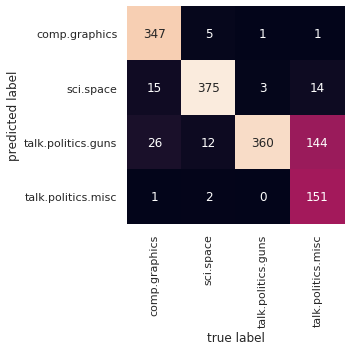

In [ ]:
%matplotlib inline

# importing all needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix\

from sklearn.datasets import make_blobs

sns.set()

X, y = make_blobs(100, 2, centers=2, random_state=20, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

model = GaussianNB()
model.fit(X, y);

rng = np.random.RandomState(0)
Xnew = [-2, -4] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=100, cmap='RdBu', alpha=0.1)
plt.axis(lim);

data = fetch_20newsgroups()
data.target_names

categories = ['talk.politics.guns', 'talk.politics.misc',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)
labels = model.predict(test.data)

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

print(predict_category('sending a payload to the ISS'))
print(predict_category('Adobe Photoshop will revolutionize it all'))
predict_category("Pistols are legalized in USA")

### Linear Regression

Linear regression is simplest one of algorithms that does simple math:



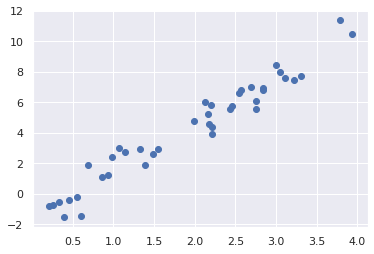

In [ ]:
# linear Regression

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

rng = np.random.RandomState(19)
x = 4 * rng.rand(40)
y = 3 * x - 1.5 + rng.randn(40)
plt.scatter(x, y);


Model slope:     2.1373168415758035
Model intercept: 0.15741749136364191
0.8624075283316012


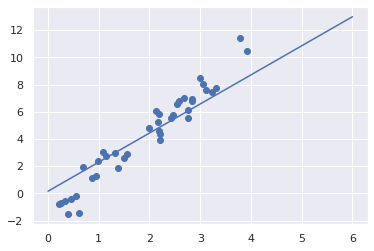

In [ ]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
model = Lasso()

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 6, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

print(model.score(x[:, np.newaxis], y))

Model slope:     2.988276854733987
Model intercept: -1.473109185860106
0.9477481027772433


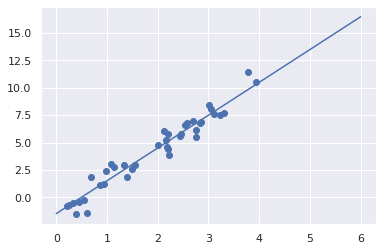

In [ ]:
model = Ridge()

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 6, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

print(model.score(x[:, np.newaxis], y))

Model slope:     3.0569822241555658
Model intercept: -1.6047557215118022
0.9482270723023785


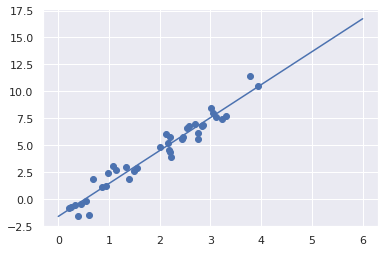

In [ ]:
model = LinearRegression()

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 6, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

print(model.score(x[:, np.newaxis], y))

### DecisionTree

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

def visualize_tree(estimator, X, y, boundaries=True,
                   xlim=None, ylim=None, ax=None):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    if xlim is None:
        xlim = ax.get_xlim()
    if ylim is None:
        ylim = ax.get_ylim()
    
    # fit the estimator
    estimator.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    n_classes = len(np.unique(y))
    Z = Z.reshape(xx.shape)
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='viridis', clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i >= 0:
            tree = estimator.tree_
        
            if tree.feature[i] == 0:
                ax.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k', zorder=2)
                plot_boundaries(tree.children_left[i],
                                [xlim[0], tree.threshold[i]], ylim)
                plot_boundaries(tree.children_right[i],
                                [tree.threshold[i], xlim[1]], ylim)
        
            elif tree.feature[i] == 1:
                ax.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k', zorder=2)
                plot_boundaries(tree.children_left[i], xlim,
                                [ylim[0], tree.threshold[i]])
                plot_boundaries(tree.children_right[i], xlim,
                                [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, xlim, ylim)

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'clim'


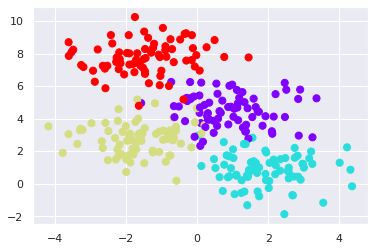

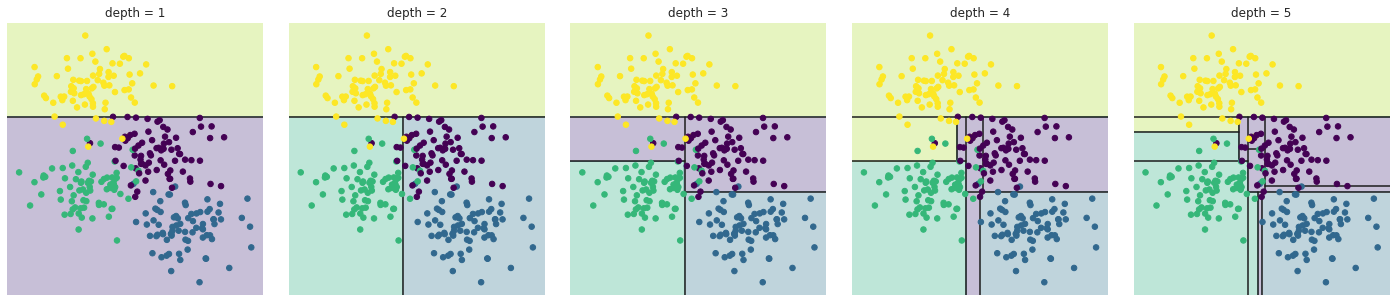

In [89]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

fig, ax = plt.subplots(1, 5, figsize=(20, 5))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

# overfitting for large depths
for axi, depth in zip(ax, range(1, 6)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))


### RandomForest classifier

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: The following kwargs were not used by contour: 'clim'


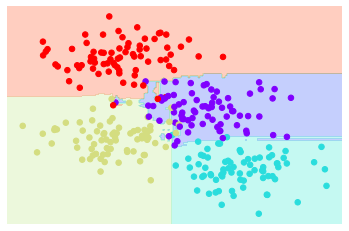

In [92]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y);


In [71]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X, y)

print("score = ", tree_clf.score(X, y))
print("prediction = ", tree_clf.predict(X[0:2]))
print("prediction probs = ", tree_clf.predict_proba(X[0:2]))

score =  0.9866666666666667
prediction =  [0 0]
prediction probs =  [[1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
!dot -Tpng /content/iris_tree.dot -o tree.png

### Comparation of classifiers on simple datasets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.metrics import f1_score, precision_score, recall_score

h = .02  # step size in the mesh

"""
    TODO:
    - put algorithm names into names table
    - put algorithms you`ll use into classifiers table
    - add all needed includes
    
    - add using scaller and apply it to data if flag is set to True (set_scaler)
    - split data to tran test parts if you think it`s desired

    - train classfier
    - make desired metrics you want for each model
    - predict output on test data
    - append for respective tables
    - if classifier predicts probability assing prredicted probabilities values to Z as boundary values
    - if classifier predicts values assign predicted values into Z  as boundary values
"""

names = []

classifiers = []

def generateAndClassifiy(use_scaler = True, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, flip_y=0.01):
  """
  TODO: Parameters description
  Default values are easy task

  """
  # generates n_features classification problem ( in this case with 2  target labels )
  X, y = make_classification(n_features=n_features, 
                             n_redundant=n_redundant, 
                             n_informative=n_informative,
                             random_state=random_state, 
                             n_clusters_per_class=n_clusters_per_class,
                             flip_y=flip_y)
  rng = np.random.RandomState(2)

  """

    CHANGE min AND max TO GET DIFFERENT VALUES
    WITH DEFAULT min=0.0 max =0.1 METRICS ARE >90%
    NORMALIZATION EFFECT IS VISIBLE WHEN DISTRIBUTION IS
    BIGGER

  """
  X += 2 * rng.uniform(low=0.0, high=10, size=X.shape)
  linearly_separable = (X, y)

  # make few datasets that have different shape / distribution of points

  datasets = [make_moons(noise=0.3, random_state=0),
              make_circles(noise=0.2, factor=0.5, random_state=1),
              linearly_separable
              ]

  figure = plt.figure(figsize=(27, 9))
  i = 1
  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
    
      X, y = ds
      # preprocess dataset, split into training and test part
      """

        IMPORTANT: always scale datasets before making any fitting/ training.
        Many alghoritms depends on data scale and can have 10xtimes worse results when scaled and when not.
        For example SVM/LinearRegression/NearestNeighbors are very sensitive

        Scaling can be done with StandardScaler() method from sklearn, that makes operation:
                    value - std mean
        new_value = ----------------
                      std deviation

        splitting data into train and test datasets can be done with train_test_split(input_data, target_data, ...)

      """

      #TODO: Put code here

      

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          """

            Training of classifiers can be donw using each model 

              .fit(input_data, targets)
            
            method

            If we want to get decision_functions ( what function given classifier uses to make decision ) we can get it with method

              .decision_function(input_data, output_data ) , each with sizes for example (100,) (only one dimension)

            It tells us how decisions are made/ what is treshold or boundary value of each classifier for given data

            classifier method 

            .score(...) 

            gives mean accuracy of model, what is not so good metric, because when 99% is ok we can classify all as ok and still get 99% accuracy

          """
            
          #TODO put code here
          #TODO put boundary values here

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                    edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                    edgecolors='k', alpha=0.6)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

  """

    In case of SVM we can see that without RBF classifier can only classify linear datasets
    In case of Decision tree we can see that it tends to overfit ( many small shapes on second charts)

    Some statistics can be made using precision/recall/f1_score metrics
    More about metrics can be found under : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

    precision =  True_positives/(True_positives + False_positives)
    recall = True_positives/(True_positives + False_Negatives)

    f1_score - generalization of f_beta score. Harmonic mean of precission nad recall, so both have impact on it

                  precision * recall
    f1_score = 2 * ------------------
                  precision + recall

    other commonly used metrics are : precision_recall_curve, roc_curve, roc_auc_curve, f_beta score ( beta=[1,10]), confusion_matrix

  """ 

  for name, pr, rec, f1 in zip(names, precisions, recalls, f1_scores):
    print("{} : precision {:.5}   recall {:.5}   f1_score {:.5}" .format(name.ljust(20), pr, rec, f1))

# Projects

There are 3 projects :

1. Heart Disease Classification 
2. Titianic Dataset
3. Kaggle [flight delays](https://www.kaggle.com/c/flight-delays-spring-2018)

### Project 1 Hearth Disease Classification

1. heart.csv file containing dataset can be found in `data/hearth Disease Classification` folder
2. Informations about dataset can be found under informations.md file in same directory as dataset
3. you can load dataset using [pandas library](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
4. dataset is taken from https://www.kaggle.com/ronitf/heart-disease-uci/data page
5. It can be solved using normal ML techniques and is real dataset, not prepared one. 
6. Try to get best result you can with metric of your choose nd classifier of your choose
7. It's good for learning, because there are no interfeatures dependencies

### Project 2 Titanic Dataset

1. Notebook is avialable in `Titanic Classification Task.ipynb`
2. Because it's harder dataset, with empty values etc, there are some commencts plus walkthroug in it
3. Try to get best score with classic ML techniques
4. things mentioned there are just examples how dataset can be analysed, you can search of some dependencies etc, use Lasso regression to get most important features etc.

### More datasets assigned for each topic with simple explainations
https://www.kaggle.com/kashnitsky/mlcourse